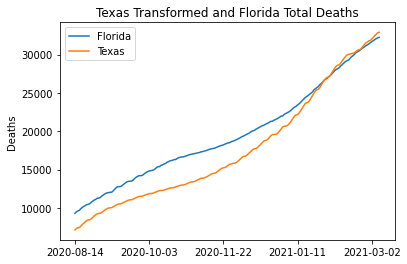

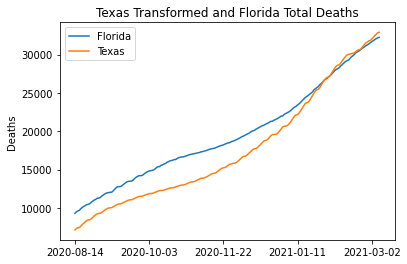

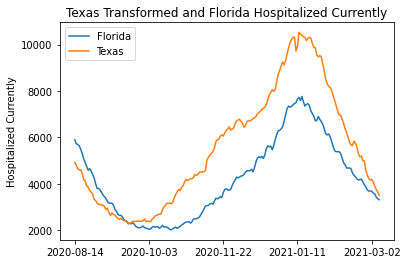

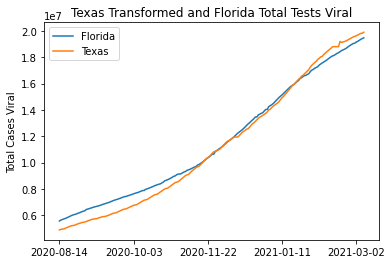

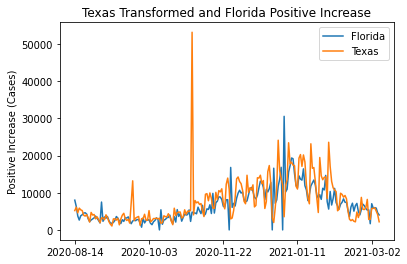

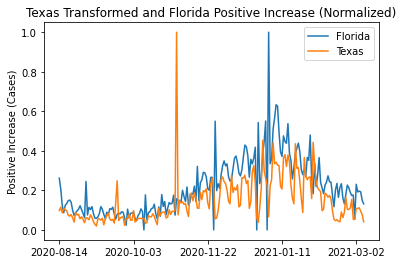

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

def statistical_testing(covid_Perc, florida_DF, texas_transformed_DF):
    fl_perc = stats.binom.pmf(florida_DF['positiveCasesViral'].iloc[0], florida_DF['totalTestsViral'].iloc[0], covid_Perc)
    tx_perc = stats.binom.pmf(texas_transformed_DF['positiveCasesViral'].iloc[0], texas_transformed_DF['totalTestsViral'].iloc[0], covid_Perc)
    print(fl_perc)
    print(tx_perc)

def correlation_Analysis(texas_DF, florida_DF, texas_transformed_DF):
    #florida_DF.corr(method ='pearson')
    print("\nCorrelation Analysis Between Florda Data and Transformed Texas Data Set:")

    print("\nPearson Correlation")
    print(florida_DF.corrwith(texas_transformed_DF,axis=0,method ='pearson',drop=True).to_string())

    print("\nKendall  Correlation")
    print(florida_DF.corrwith(texas_transformed_DF,axis=0,method ='kendall',drop=True).to_string())

    print("\nSpearman  Correlation")
    print(florida_DF.corrwith(texas_transformed_DF,axis=0,method ='spearman',drop=True).to_string())

    print("\n\n")

def plot_Data(texas_DF, florida_DF, texas_transformed_DF):

    # Used for the transformed df
    trans_total_hosp = texas_transformed_DF['hospitalizedCurrently'].sum()
    
    texas_total_hosp = texas_DF['hospitalizedCurrently'].sum()
    
    florida_total_hosp = florida_DF['hospitalizedCurrently'].sum()

        
    # Plot Texas Transformed and Florida Deaths
    plt.figure()
    plt.title("Texas Transformed and Florida Total Deaths")
    plt.plot(florida_DF['date'].iloc[::-1],florida_DF["death"].iloc[::-1], label='Florida')
    plt.plot(texas_transformed_DF['date'].iloc[::-1],texas_transformed_DF["death"].iloc[::-1], label='Texas')
    ax = plt.gca()
    plt.ylabel("Deaths")
    ax.legend()
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    plt.show()


    # Plot Texas and Florida Deaths
    plt.figure()
    plt.title("Texas Transformed and Florida Total Deaths")
    plt.plot(florida_DF['date'].iloc[::-1],florida_DF["death"].iloc[::-1], label='Florida')
    plt.plot(texas_DF['date'].iloc[::-1],texas_DF["death"].iloc[::-1], label='Texas')
    ax = plt.gca()
    plt.ylabel("Deaths")
    ax.legend()
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    plt.show()


    # Plot Texas and hospitalizedCurrently
    plt.figure()
    plt.title("Texas Transformed and Florida Hospitalized Currently")
    plt.plot(florida_DF['date'].iloc[::-1],florida_DF["hospitalizedCurrently"].iloc[::-1], label='Florida')
    plt.plot(texas_transformed_DF['date'].iloc[::-1],texas_transformed_DF["hospitalizedCurrently"].iloc[::-1], label='Texas')
    ax = plt.gca()
    plt.ylabel("Hospitalized Currently")
    ax.legend()
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    plt.show()

    # Plot Texas and Total Tests Viral
    plt.figure()
    plt.title("Texas Transformed and Florida Total Tests Viral")
    plt.plot(florida_DF['date'].iloc[::-1],florida_DF["totalTestsViral"].iloc[::-1], label='Florida')
    plt.plot(texas_transformed_DF['date'].iloc[::-1],texas_transformed_DF["totalTestsViral"].iloc[::-1], label='Texas')
    ax = plt.gca()
    plt.ylabel("Total Cases Viral")
    ax.legend()
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    plt.show()

    # Plot Texas and Positive Increase
    plt.figure()
    plt.title("Texas Transformed and Florida Positive Increase")
    plt.plot(florida_DF['date'].iloc[::-1],florida_DF["positiveIncrease"].iloc[::-1], label='Florida')
    plt.plot(texas_transformed_DF['date'].iloc[::-1],texas_transformed_DF["positiveIncrease"].iloc[::-1], label='Texas')
    ax = plt.gca()
    plt.ylabel("Positive Increase (Cases)")
    ax.legend()
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    plt.show()


    # Plot Texas and Positive Increase Normalized
    plt.figure()
    plt.title("Texas Transformed and Florida Positive Increase (Normalized)")
    plt.plot(florida_DF['date'].iloc[::-1],florida_DF["positiveIncrease"].iloc[::-1] / florida_DF["positiveIncrease"].iloc[::-1].abs().max(), label='Florida')
    plt.plot(texas_transformed_DF['date'].iloc[::-1],texas_transformed_DF["positiveIncrease"].iloc[::-1] / texas_transformed_DF["positiveIncrease"].iloc[::-1].abs().max(), label='Texas')
    ax = plt.gca()
    plt.ylabel("Positive Increase (Cases)")
    ax.legend()
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    plt.show()

def transform_data(df, size):
    #Transforms data to mathc population size
    df['death'] = df['death'].transform(lambda x: round(x * size, 0))
    df['deathIncrease'] = df['deathIncrease'].transform(lambda x: round(x * size, 0))
    df['hospitalizedCurrently'] = df['hospitalizedCurrently'].transform(lambda x: round(x * size, 0))
    df['positiveCasesViral'] = df['positiveCasesViral'].transform(lambda x: round(x * size, 0))
    df['positiveIncrease'] = df['positiveIncrease'].transform(lambda x: round(x * size, 0))
    return df

if __name__ == '__main__':
    covid_Perc = .995
    florida_Pop = 2148000
    texas_Pop = 2900000
    texas_Data = pd.read_csv(("texas-history.csv"),
                        usecols=['date', 'state', 'death', 'deathIncrease', 'hospitalizedCurrently', 'positiveCasesViral', 'positiveIncrease', 'totalTestsViral'])
    florida_Data = pd.read_csv(("florida-history.csv"),
                        usecols=['date', 'state', 'death', 'deathIncrease', 'hospitalizedCurrently', 'positiveCasesViral', 'positiveIncrease', 'totalTestsViral'])
    texas_DF = pd.DataFrame(texas_Data, columns =['date', 'state', 'death', 'deathIncrease', 'hospitalizedCurrently', 'positiveCasesViral', 'positiveIncrease', 'totalTestsViral'])
    florida_DF = pd.DataFrame(florida_Data, columns =['date', 'state', 'death', 'deathIncrease', 'hospitalizedCurrently', 'positiveCasesViral', 'positiveIncrease', 'totalTestsViral'])
    texas_DF = texas_DF.drop(range(206, 370))
    florida_DF = florida_DF.drop(range(341, 404))
    texas_DF = texas_DF.dropna()
    florida_DF = florida_DF.dropna()
    size = florida_Pop / texas_Pop
    texas_transformed_DF = transform_data(texas_DF, size)
    #print(florida_DF)
    #print(texas_DF)
    #statistical_testing(covid_Perc, florida_DF, texas_transformed_DF)
    plot_Data(texas_DF, florida_DF, texas_transformed_DF)
    #correlation_Analysis(texas_DF, florida_DF, texas_transformed_DF)